<a href="https://colab.research.google.com/github/acatherinebusinessintelligence/Python-Pandas-Ejercicios/blob/master/Rutas_proveedor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install numpy
import numpy as np


#**Numpy**
NumPy es el paquete fundamental para la computación científica en Python.
Es una biblioteca de Python que proporciona:

---


*   Un objeto de matriz multidimensional
*   Varios objetos derivados(como matrices y matrices enmascaradas)
* rutinas para operaciones rápidas en matrices(matemática, lógica, de formas, clasificación, selección, E/S)
* transformadas discretas de Fourier
* álgebra lineal básica
*simulación aleatoria y mucho más
---

https://numpy.org/

#**Matrices**

Este es un ejemplo de una matriz de 3X3, que esta representando el precio de de la ruta por ciudad y proveedor.

<table class="default">
  <tr>
    <th>Proveedor/Ciudad</th>
    <th>C1</th>
    <th>C2</th>
    <th>C3</th>
  </tr>
  <tr>
    <th>P1</td>
    <td>11.200</td>
    <td>11.700</td>
    <td>11.800</td>
  </tr>
  <tr>
    <th>P2</th>
    <td>10.500</td>
    <td>12.000</td>
    <td>8.500</td>
  </tr>
  <tr>
    <th>P3</th>
    <td>11.000</td>
    <td>11.500</td>
    <td>12.000</td>
  </tr>
</table>

Tenemos una matriz de 2X2, que esta representanda la distribución planificada a una cadena de almacenes a cada una de las ciudades, especificando la cantidad de viajes a realizar por mes para las ciudades C1,C2,C3.

<table class="default">
  <tr>
    <th>ViajesXmes/Contrato</th>
    <th>Contrato 1</th>
    <th>Contrato 2</th>
    
  </tr>
  <tr>
    <th>C1</td>
    <td>30</td>
    <td>20</td>
    
  </tr>
  <tr>
    <th>C2</th>
    <td>15</td>
    <td>12</td>
   </tr>
  <tr>
    <th>C3</th>
    <td>23</td>
    <td>15</td>
  </tr>
</table>

Para entender la utilidad de *Numpy*, vamos a realizar el calculo para encontrar con que proveedor se debe programar las rutas, sabiendo que los proveedores cuenta con las garantías necesarias para el suministro.



## **Ingresando Datos**
Ahora vamos a ingresar nuestros datos creamos nuestra primera matriz de 3X3

Precio paquete de de la ruta por ciudad y proveedor

$
\left(
\begin{array}{ll}
11200&11700&11800 \\
10500&12000&8500 \\
11000&11500&12000
\end{array}
\right)
$


Distribución de los contratos X ciudad

$
\left(
\begin{array}{ll}
30&20 \\
15&12 \\
23&15
\end{array}
\right)
$


Para ingresar datos en una matriz utilizamos **numpy.array**

Donde vamos a ingresar varias lista , que serian los vectores de las matrices

**np.array(lista)**

Crea un array a partir de la lista o tupla lista y devuelve una referencia a él. El número de dimensiones del array dependerá de las listas o tuplas anidadas en lista:

* Para una lista de valores se crea un array de una dimensión, también conocido como vector.
* Para una lista de listas de valores se crea un array de dos dimensiones, también conocido como matriz.
* Para una lista de listas de listas de valores se crea un array de tres dimensiones, también conocido como cubo.
*No hay límite en el número de dimensiones del array más allá de la memoria disponible en el sistema.



In [2]:
#Proveedor=[Precio Ciudad 1, Precio Ciudad 2, Precio Ciudad 3] 
P1=[11200,11700,11800]
P2=[10500,12000,8500]
P3=[11000,11500,12000]

In [3]:
precios_proveedores=np.array([P1,P2,P3])

In [ ]:
#Vamos a crear matriz de los viajes por ciudad por contrato a realizar
# Viajes X Ciudad = [no. viajes contrato1,no. viajes contrato2] 
C1=[30,20]
C2=[15,12]
C3=[23,15]
viajesXciudad=np.array([C1,C2,C3])
print(precios_proveedores)
print(viajesXciudad)

Ya hemos ingresado los datos en las matrices a traves de listas, procedemos a realizar el calculo para encontrar con que proveedor se debe programar las rutas, sabiendo que los proveedores cuenta con las garantías necesarias para el suministro, para ello multiplicamos las matrices con la funcion numpy.dot(p,q)

In [10]:
donde_comprar = np.dot(precios_proveedores, viajesXciudad)
print(donde_comprar)

[[782900 541400]
 [690500 481500]
 [778500 538000]]


In [11]:
min_rest = np.min(donde_comprar, 0)
print(min_rest)

[690500 481500]


<table class="default">
  <tr>
    <th>Proveedor/Contrato</th>
    <th>Contrato 1</th>
    <th>Contrato 2</th>
    
  </tr>
  <tr>
    <th>P1</td>
    <td>782.900</td>
    <td>541.400</td>
    
  </tr>
  <tr>
    <th>P2</th>
    <td>690.500</td>
    <td>481.500</td>
   </tr>
  <tr>
    <th>P3</th>
    <td>778500</td>
    <td>538.000</td>
  </tr>
</table>

Conclusión: El Proveedor P2 es el más conveniente para el manejo de los dos contratos de distribución, ya que cumple con las condiciones económicas.

Nota: este es un analisis solo económico, no encierra las variables que interceden en la negoociación, las cuales encierran, tiempos, riesgos, formas de pago, entre otros.

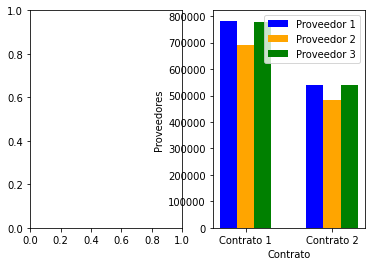

In [12]:
import matplotlib.pyplot as plt 
fig, (x1,x2) = plt.subplots(nrows=1, ncols=2) 
x = np.arange(2) 
P1 = donde_comprar[0]
P2 = donde_comprar[1]
P3 = donde_comprar[2]
width = 0.2
  
plt.bar(x-0.2, P1, width, color='blue') 
plt.bar(x, P2, width, color='orange') 
plt.bar(x+0.2, P3, width, color='green') 
plt.xticks(x, ['Contrato 1', 'Contrato 2']) 
plt.xlabel("Contrato") 
plt.ylabel("Proveedores") 
plt.legend(["Proveedor 1", "Proveedor 2", "Proveedor 3"]) 
plt.show() 


<table class="default">
  <tr>
    <th>Proveedor/Contrato</th>
    <th>Contrato 1</th>
    <th>Contrato 2</th>
    
  </tr>
  <tr>
    <th>P1</td>
    <td>782.900</td>
    <td>541.400</td>
    
  </tr>
  <tr>
    <th>P2</th>
    <td>690.500</td>
    <td>481.500</td>
   </tr>
  <tr>
    <th>P3</th>
    <td>778500</td>
    <td>538.000</td>
  </tr>
</table>